## Portfolio Exercise: Starbucks
<br>

<img src="https://opj.ca/wp-content/uploads/2018/02/New-Starbucks-Logo-1200x969.jpg" width="200" height="200">
<br>
<br>
 
#### Background Information

The dataset you will be provided in this portfolio exercise was originally used as a take-home assignment provided by Starbucks for their job candidates. The data for this exercise consists of about 120,000 data points split in a 2:1 ratio among training and test files. In the experiment simulated by the data, an advertising promotion was tested to see if it would bring more customers to purchase a specific product priced at $10. Since it costs the company 0.15 to send out each promotion, it would be best to limit that promotion only to those that are most receptive to the promotion. Each data point includes one column indicating whether or not an individual was sent a promotion for the product, and one column indicating whether or not that individual eventually purchased that product. Each individual also has seven additional features associated with them, which are provided abstractly as V1-V7.

#### Optimization Strategy

Your task is to use the training data to understand what patterns in V1-V7 to indicate that a promotion should be provided to a user. Specifically, your goal is to maximize the following metrics:

* **Incremental Response Rate (IRR)** 

IRR depicts how many more customers purchased the product with the promotion, as compared to if they didn't receive the promotion. Mathematically, it's the ratio of the number of purchasers in the promotion group to the total number of customers in the purchasers group (_treatment_) minus the ratio of the number of purchasers in the non-promotional group to the total number of customers in the non-promotional group (_control_).

$$ IRR = \frac{purch_{treat}}{cust_{treat}} - \frac{purch_{ctrl}}{cust_{ctrl}} $$


* **Net Incremental Revenue (NIR)**

NIR depicts how much is made (or lost) by sending out the promotion. Mathematically, this is 10 times the total number of purchasers that received the promotion minus 0.15 times the number of promotions sent out, minus 10 times the number of purchasers who were not given the promotion.

$$ NIR = (10\cdot purch_{treat} - 0.15 \cdot cust_{treat}) - 10 \cdot purch_{ctrl}$$

For a full description of what Starbucks provides to candidates see the [instructions available here](https://drive.google.com/open?id=18klca9Sef1Rs6q8DW4l7o349r8B70qXM).

Below you can find the training data provided.  Explore the data and different optimization strategies.

#### How To Test Your Strategy?

When you feel like you have an optimization strategy, complete the `promotion_strategy` function to pass to the `test_results` function.  
From past data, we know there are four possible outomes:

Table of actual promotion vs. predicted promotion customers:  

<table>
<tr><th></th><th colspan = '2'>Actual</th></tr>
<tr><th>Predicted</th><th>Yes</th><th>No</th></tr>
<tr><th>Yes</th><td>I</td><td>II</td></tr>
<tr><th>No</th><td>III</td><td>IV</td></tr>
</table>

The metrics are only being compared for the individuals we predict should obtain the promotion – that is, quadrants I and II.  Since the first set of individuals that receive the promotion (in the training set) receive it randomly, we can expect that quadrants I and II will have approximately equivalent participants.  

Comparing quadrant I to II then gives an idea of how well your promotion strategy will work in the future. 

piGet started by reading in the data below.  See how each variable or combination of variables along with a promotion influences the chance of purchasing.  When you feel like you have a strategy for who should receive a promotion, test your strategy against the test dataset used in the final `test_results` function.

In [1]:
!pip install -U pip
!pip install imblearn
!pip install xgboost

    100% |████████████████████████████████| 1.6MB 5.6MB/s eta 0:00:01    86% |███████████████████████████▊    | 1.3MB 9.0MB/s eta 0:00:01
  Found existing installation: pip 18.1
    Uninstalling pip-18.1:
      Successfully uninstalled pip-18.1
     |████████████████████████████████| 206 kB 5.1 MB/s eta 0:00:01
     |████████████████████████████████| 14.8 MB 8.2 MB/s eta 0:00:011    |███████                         | 3.2 MB 12.5 MB/s eta 0:00:01     |██████████▎                     | 4.8 MB 12.5 MB/s eta 0:00:01     |█████████████▌                  | 6.3 MB 12.5 MB/s eta 0:00:01     |██████████████▉                 | 6.9 MB 12.5 MB/s eta 0:00:01     |████████████████▏               | 7.5 MB 12.5 MB/s eta 0:00:01     |███████████████████████▋        | 10.9 MB 12.5 MB/s eta 0:00:01     |████████████████████████▊       | 11.5 MB 8.2 MB/s eta 0:00:01     |████████████████████████████▍   | 13.2 MB 8.2 MB/s eta 0:00:01
     |████████████████████████████████| 22.2 MB 7.2 MB/s eta 0:00:01    |

     |████████████████████▎           | 105.6 MB 5.4 MB/s eta 0:00:12   |▏                               | 788 kB 4.5 MB/s eta 0:00:37     |▎                               | 1.2 MB 4.5 MB/s eta 0:00:37     |▌                               | 2.8 MB 4.5 MB/s eta 0:00:37     |▊                               | 3.8 MB 4.5 MB/s eta 0:00:36     |█                               | 4.9 MB 4.5 MB/s eta 0:00:36     |█                               | 5.5 MB 4.5 MB/s eta 0:00:36     |█▏                              | 6.1 MB 4.5 MB/s eta 0:00:36     |█▊                              | 8.9 MB 4.5 MB/s eta 0:00:35     |██▎                             | 11.6 MB 5.9 MB/s eta 0:00:27     |██▍                             | 12.7 MB 5.9 MB/s eta 0:00:26     |██▋                             | 13.8 MB 5.9 MB/s eta 0:00:26     |██▊                             | 14.4 MB 5.9 MB/s eta 0:00:26     |██▉                             | 14.9 MB 5.9 MB/s eta 0:00:26     |███                             | 15.4 MB 5.9 MB/s 

     |████████████████████████████████| 166.7 MB 8.6 kB/s eta 0:00:011    |████████████████████▌           | 107.0 MB 6.2 MB/s eta 0:00:10     |████████████████████▋           | 107.5 MB 6.2 MB/s eta 0:00:10     |████████████████████▊           | 108.0 MB 6.2 MB/s eta 0:00:10     |█████████████████████           | 109.7 MB 6.2 MB/s eta 0:00:10     |█████████████████████▏          | 110.3 MB 6.2 MB/s eta 0:00:10     |█████████████████████▍          | 111.5 MB 6.2 MB/s eta 0:00:09     |█████████████████████▌          | 112.0 MB 6.2 MB/s eta 0:00:09     |█████████████████████▊          | 113.2 MB 6.2 MB/s eta 0:00:09     |██████████████████████          | 114.2 MB 6.2 MB/s eta 0:00:09     |██████████████████████          | 114.8 MB 6.2 MB/s eta 0:00:09     |██████████████████████▎         | 115.8 MB 8.5 MB/s eta 0:00:06     |██████████████████████▍         | 116.5 MB 8.5 MB/s eta 0:00:06     |██████████████████████▌         | 117.5 MB 8.5 MB/s eta 0:00:06     |██████████████████████▋     

In [2]:
# load in packages
from itertools import combinations

from test_results import test_results, score
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import xgboost as xgb
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# load in the data
train_data = pd.read_csv('./training.csv')
train_data.head()

,ID,Promotion,purchase,V1,V2,V3,V4,V5,V6,V7
0,1,No,0,2,30.443518,-1.165083,1,1,3,2
1,3,No,0,3,32.159350,-0.645617,2,3,2,2
2,4,No,0,2,30.431659,0.133583,1,1,4,2
3,5,No,0,0,26.588914,-0.212728,2,1,4,2
4,8,Yes,0,3,28.044332,-0.385883,1,1,2,2


In [3]:
# Cells for you to work and document as necessary - 
# definitely feel free to add more cells as you need

#load test data
test_data = pd.read_csv('./Test.csv')
test_data.head()

,ID,Promotion,purchase,V1,V2,V3,V4,V5,V6,V7
0,2,No,0,1,41.376390,1.172517,1,1,2,2
1,6,Yes,0,1,25.163598,0.653050,2,2,2,2
2,7,Yes,0,1,26.553778,-1.597972,2,3,4,2
3,10,No,0,2,28.529691,-1.078506,2,3,2,2
4,12,No,0,2,32.378538,0.479895,2,2,1,2


In [4]:
#checking no of customers which received promotion and no. of customers who purchased the product
print(train_data['Promotion'].value_counts())
print(train_data['purchase'].value_counts())

Yes    42364
No     42170
Name: Promotion, dtype: int64
0    83494
1     1040
Name: purchase, dtype: int64




# BASE-LINE MODEL:
First we will check our base line model where we send out promotion to everyone. We'll check how it fares on our chosen metrics i.e. IRR and NIR. Meanwhile we'll also check if we have enough no. of observations to draw conclusions from, with this model as reference to progress further.

In [5]:
#testing base line model
def promotion_strategy(df):
    '''
    INPUT 
    df - a dataframe with *only* the columns V1 - V7 (same as train_data)

    OUTPUT
    promotion_df - np.array with the values
                   'Yes' or 'No' related to whether or not an 
                   individual should recieve a promotion 
                   should be the length of df.shape[0]
                
    Ex:
    INPUT: df
    
    V1	V2	  V3	V4	V5	V6	V7
    2	30	-1.1	1	1	3	2
    3	32	-0.6	2	3	2	2
    2	30	0.13	1	1	4	2
    
    OUTPUT: promotion
    
    array(['Yes', 'Yes', 'No'])
    indicating the first two users would recieve the promotion and 
    the last should not.
    '''    
    promotion = []
    
    for i in range(df.shape[0]):
        promotion.append('Yes')
    
    promotion = np.array(promotion)
    
    return promotion

In [6]:
# This will test your results, and provide you back some information 
# on how well your promotion_strategy will work in practice

test_results(promotion_strategy)

Nice job!  See how well your strategy worked on our test data below!

Your irr with this strategy is 0.0096.

Your nir with this strategy is -1132.20.
We came up with a model with an irr of 0.0188 and an nir of 189.45 on the test set.

 How did you do?


(0.009593158278250108, -1132.1999999999998)

In [7]:
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize
#Check sample considering standard Type I error rate (alpha = 0.05) and Power of 0.8
#Baseline model IRR = 0.0096
#Strabucks' model IRR = 0.0188
NormalIndPower().solve_power(effect_size = proportion_effectsize(.0096, .0188), alpha = .05, power = 0.8,
                             alternative = 'smaller')

1990.3964646389124

In [8]:
#Checking size of control and treatment groups
print(train_data[train_data['Promotion']=='Yes'].shape[0])
print(train_data[train_data['Promotion']=='No'].shape[0])

42364
42170


Seems like our base line model doesn't even remotely perform as good. It has NIR in negative (-1132) which suggests sending out promotion to everyone is definitely not a good idea. Also, no. of observations we can see is sufficient for the experiment.

# Model 2: Uplift Model

We observed from our Baseline Model that sending out promotions to everyone is not an optimal strategy. To overcome that we'll divide our customes into 4 Broad groups. (Reference:[Uplift Modeling](https://towardsdatascience.com/uplift-modeling-e38f96b1ef60))

1.Treatment Responders: Customers that will purchase only if they receive an offer
2.Treatment Non-Responders: Customer that won’t purchase in any case
3.Control Responders: Customers that will purchase without an offer
4.Control Non-Responders: Customers that will not purchase if they don’t receive an offer

In the above set of groups our focus will be on TR and CN and we'll calculate our lift score as described in the the post.<br>
                  <b><i><h3><center>Uplift Score = $P_T$$_R$+$P_C$$_N$-$P_T$$_N$-$P_C$$_R$</center><h3><i></b>
    
If the above uplift score turns out to be 0 we may send out the promotion but we'll try different thresholds and check what gives us the best result. For better results to calculate threshold gridsearch can be used, however we'll stick to manually trying our different thresholds (quantiles).

# Multi Class Classification:

We'll classify customers into 4 distinguished classes (TN, CN, TR and CR) to calculate the uplift score. The above defined criterias will be used to for each data set (Training and Test) to create additional column signifying one of the 4 classes.

In [9]:
#create additional column of target class in train data set
train_data['target_class']=0 #CN
train_data.loc[(train_data.Promotion == 'No') & (train_data.purchase == 1),'target_class'] = 1 #CR
train_data.loc[(train_data.Promotion == 'Yes') & (train_data.purchase == 0),'target_class'] = 2 #TN
train_data.loc[(train_data.Promotion == 'Yes') & (train_data.purchase ==1),'target_class'] = 3 #TR

#create additional column of target class in test data set
test_data['target_class']=0 #CN
test_data.loc[(test_data.Promotion == 'No') & (test_data.purchase == 1),'target_class'] = 1 #CR
test_data.loc[(test_data.Promotion == 'Yes') & (test_data.purchase == 0),'target_class'] = 2 #TN
test_data.loc[(test_data.Promotion == 'Yes') & (test_data.purchase ==1),'target_class'] = 3 #TR


train_data['target_class'].value_counts()

0    41851
2    41643
3      721
1      319
Name: target_class, dtype: int64

From above count we can see that no of observations corresponding to classes 3 and 1 are very less. Therefore, we'll use sampling technique (SMOTE) to oversample minority classes for our training data. 


In [10]:
#split data into train and valid set
train, valid = sk.model_selection.train_test_split(train_data, test_size=0.2, random_state=42)

features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7']

#split dataset into response and target variables
Y_train = train['target_class']
X_train = train[features]

Y_valid = valid['target_class']
X_valid = valid[features]

Y_test = test_data['target_class']
X_test = test_data[features]

In [11]:
Y_train.value_counts()

0    33444
2    33351
3      580
1      252
Name: target_class, dtype: int64

In [12]:
#oversample minority class with SMOTE
sm = SMOTE(random_state=44)
X_train_ovsamp, Y_train_ovsamp = sm.fit_resample(X_train, Y_train)

#check value counts of each class
Y_train_ovsamp.value_counts()

3    33444
2    33444
1    33444
0    33444
Name: target_class, dtype: int64

In [13]:
#Fit model using Extreme Gradient Boosting classifier
eval_set = [(X_train_ovsamp, Y_train_ovsamp), (X_valid, Y_valid)]
model = xgb.XGBClassifier(learning_rate = 0.1,\
                          num_class=4,\
                                  max_depth = 7,\
                                  min_child_weight = 5,\
                                  objective = 'multi:softmax',\
                                  seed = 42,\
                                  gamma = 0.1,\
                                  silent = True)
model.fit(X_train_ovsamp, Y_train_ovsamp, eval_set=eval_set,\
                    eval_metric="mlogloss", verbose=True, early_stopping_rounds=30)

/opt/conda/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:41:35] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-mlogloss:1.36260	validation_1-mlogloss:1.37680
[1]	validation_0-mlogloss:1.34199	validation_1-mlogloss:1.36883
[2]	validation_0-mlogloss:1.32322	validation_1-mlogloss:1.36164
[3]	validation_0-mlogloss:1.30601	validation_1-mlogloss:1.35496
[4]	validation_0-mlogloss:1.29084	validation_1-mlogloss:1.34878
[5]	validation_0-mlogloss:1.27655	validation_1-mlogloss:1.34283
[6]	validation_0-mlogloss:1.26076	validation_1-mlogloss:1.33696
[7]	validation_0-mlogloss:1.24558	validation_1-mlogloss:1.33030
[8]	validation_0-mlogloss:1.23284	validation_1-mlogloss:1.32489
[9]	validation_0-mlogloss:1.22110	validation_1-mlogloss:1.32050
[10]	validation_0-mlogloss:1.210

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=1, num_class=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=42, silent=True,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:104: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  UserWarning


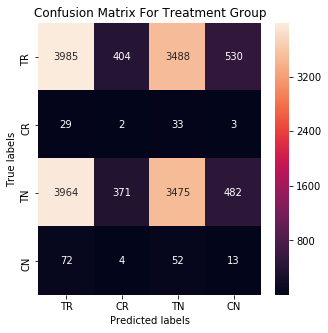

In [14]:
#confusion matrix for validation set
valid_pred = model.predict(X_valid, ntree_limit=model.best_ntree_limit)
cm = sk.metrics.confusion_matrix(Y_valid, valid_pred)

fig, ax= plt.subplots(figsize=(5,5))
sb.heatmap(cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix For Treatment Group'); 
ax.xaxis.set_ticklabels(['TR', 'CR', 'TN', 'CN']); 
ax.yaxis.set_ticklabels(['TR', 'CR', 'TN', 'CN']);

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:104: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  UserWarning


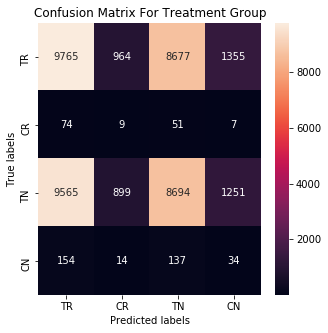

In [15]:
#confusion matrix for test set
test_pred = model.predict(X_test, ntree_limit=model.best_ntree_limit)
cm = sk.metrics.confusion_matrix(Y_test, test_pred)

fig, ax= plt.subplots(figsize=(5,5))
sb.heatmap(cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix For Treatment Group'); 
ax.xaxis.set_ticklabels(['TR', 'CR', 'TN', 'CN']); 
ax.yaxis.set_ticklabels(['TR', 'CR', 'TN', 'CN']);

In [16]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7
0,1,41.376390,1.172517,1,1,2,2
1,1,25.163598,0.653050,2,2,2,2
2,1,26.553778,-1.597972,2,3,4,2
3,2,28.529691,-1.078506,2,3,2,2
4,2,32.378538,0.479895,2,2,1,2


In [17]:
#testing model with 90th quantile on uplift score as threshold value
def promotion_strategy(df):
    '''
    INPUT 
    df - a dataframe with *only* the columns V1 - V7 (same as train_data)

    OUTPUT
    promotion_df - np.array with the values
                   'Yes' or 'No' related to whether or not an 
                   individual should recieve a promotion 
                   should be the length of df.shape[0]
                
    Ex:
    INPUT: df
    
    V1	V2	  V3	V4	V5	V6	V7
    2	30	-1.1	1	1	3	2
    3	32	-0.6	2	3	2	2
    2	30	0.13	1	1	4	2
    
    OUTPUT: promotion
    
    array(['Yes', 'Yes', 'No'])
    indicating the first two users would recieve the promotion and 
    the last should not.
    '''
    #predicting class probabilities
    overall_proba = model.predict_proba(df)

    #assign probabilities to 4 different columns
    df['proba_CN'] = overall_proba[:,0] 
    df['proba_CR'] = overall_proba[:,1] 
    df['proba_TN'] = overall_proba[:,2] 
    df['proba_TR'] = overall_proba[:,3]

    #calculate uplift score for all customers
    df['uplift_score'] = df.eval('proba_CN + proba_TR - proba_TN - proba_CR')
    
    #calculating 75th quantile
    df_lift = df.copy()
    uplift_q_90 = df_lift.uplift_score.quantile(0.90)
    
    promotion = []
    
    for i in range(df.shape[0]):
        if(df.iloc[i]['uplift_score']>=uplift_q_90):
            promotion.append('Yes')
        else:
            promotion.append('No')
    
    promotion = np.array(promotion)
    
    return promotion

In [18]:
# This will test your results, and provide you back some information 
# on how well your promotion_strategy will work in practice

test_results(promotion_strategy)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Nice job!  See how well your strategy worked on our test data below!

Your irr with this strategy is 0.0213.

Your nir with this strategy is 124.75.
We came up with a model with an irr of 0.0188 and an nir of 189.45 on the test set.

 How did you do?


(0.021283639593498747, 124.75)

In [21]:
#testing model with 75th quantile on uplift score as threshold value
def promotion_strategy(df):
    '''
    INPUT 
    df - a dataframe with *only* the columns V1 - V7 (same as train_data)

    OUTPUT
    promotion_df - np.array with the values
                   'Yes' or 'No' related to whether or not an 
                   individual should recieve a promotion 
                   should be the length of df.shape[0]
                
    Ex:
    INPUT: df
    
    V1	V2	  V3	V4	V5	V6	V7
    2	30	-1.1	1	1	3	2
    3	32	-0.6	2	3	2	2
    2	30	0.13	1	1	4	2
    
    OUTPUT: promotion
    
    array(['Yes', 'Yes', 'No'])
    indicating the first two users would recieve the promotion and 
    the last should not.
    '''
    #predicting class probabilities
    overall_proba = model.predict_proba(df)

    #assign probabilities to 4 different columns
    df['proba_CN'] = overall_proba[:,0] 
    df['proba_CR'] = overall_proba[:,1] 
    df['proba_TN'] = overall_proba[:,2] 
    df['proba_TR'] = overall_proba[:,3]

    #calculate uplift score for all customers
    df['uplift_score'] = df.eval('proba_CN + proba_TR - proba_TN - proba_CR')
    
    #calculating 75th quantile
    df_lift = df.copy()
    uplift_q_75 = df_lift.uplift_score.quantile(0.75)
    
    promotion = []
    
    for i in range(df.shape[0]):
        if(df.iloc[i]['uplift_score']>=uplift_q_75):
            promotion.append('Yes')
        else:
            promotion.append('No')
    
    promotion = np.array(promotion)
    
    return promotion


In [20]:
# This will test your results, and provide you back some information 
# on how well your promotion_strategy will work in practice

test_results(promotion_strategy)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Nice job!  See how well your strategy worked on our test data below!

Your irr with this strategy is 0.0191.

Your nir with this strategy is 200.50.
We came up with a model with an irr of 0.0188 and an nir of 189.45 on the test set.

 How did you do?


(0.019077743573394968, 200.5)

In [22]:
#testing model with 50th quantile on uplift score as threshold value
def promotion_strategy(df):
    '''
    INPUT 
    df - a dataframe with *only* the columns V1 - V7 (same as train_data)

    OUTPUT
    promotion_df - np.array with the values
                   'Yes' or 'No' related to whether or not an 
                   individual should recieve a promotion 
                   should be the length of df.shape[0]
                
    Ex:
    INPUT: df
    
    V1	V2	  V3	V4	V5	V6	V7
    2	30	-1.1	1	1	3	2
    3	32	-0.6	2	3	2	2
    2	30	0.13	1	1	4	2
    
    OUTPUT: promotion
    
    array(['Yes', 'Yes', 'No'])
    indicating the first two users would recieve the promotion and 
    the last should not.
    '''
    #predicting class probabilities
    overall_proba = model.predict_proba(df)

    #assign probabilities to 4 different columns
    df['proba_CN'] = overall_proba[:,0] 
    df['proba_CR'] = overall_proba[:,1] 
    df['proba_TN'] = overall_proba[:,2] 
    df['proba_TR'] = overall_proba[:,3]

    #calculate uplift score for all customers
    df['uplift_score'] = df.eval('proba_CN + proba_TR - proba_TN - proba_CR')
    
    #calculating 75th quantile
    df_lift = df.copy()
    uplift_q_50 = df_lift.uplift_score.quantile(0.50)
    
    promotion = []
    
    for i in range(df.shape[0]):
        if(df.iloc[i]['uplift_score']>=uplift_q_50):
            promotion.append('Yes')
        else:
            promotion.append('No')
    
    promotion = np.array(promotion)
    
    return promotion


In [23]:
# This will test your results, and provide you back some information 
# on how well your promotion_strategy will work in practice

test_results(promotion_strategy)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Nice job!  See how well your strategy worked on our test data below!

Your irr with this strategy is 0.0141.

Your nir with this strategy is -101.75.
We came up with a model with an irr of 0.0188 and an nir of 189.45 on the test set.

 How did you do?


(0.014101107220732073, -101.75)

# Conclusion:

For the two quantiles (threshold) we tested our model, our evaluation metric has performed as per given below:

<b><center><ol>1. 90th Quantile: IRR=0.0213 NIR=124.75</ol></center></b>
<b><center><ol>2. 75th Quantile: IRR=0.0190 NIR=200.50</ol></center></b>
<b><center><ol>2. 50th Quantile: IRR=0.0141 NIR=-101.75</ol></center></b>

From the above numbers, we can go for the 75th quantile as our threshold for uplift score. The model has even surpassed the benchmark, however there's still scope of improvement by considering importance of features (some more feature engineering) and grid search to improve the model Having said that, our model still holds good for the above problem statement.